Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 # open-cv used for image processing
%matplotlib inline

Directory Path assignment where our images are located

In [2]:
train_path = r"C:\Users\Franks\Desktop\Trials\Cat vs Dog\training_set" 
test_path = r"C:\Users\Franks\Desktop\Trials\Cat vs Dog\test_set"

Reading or visualising the first image from our training set

In [3]:
cat_img_train = cv2.imread(r"C:\Users\Franks\Desktop\Trials\Cat vs Dog\training_set\cats\cat.1.jpg")
dog_img_train = cv2.imread(r"C:\Users\Franks\Desktop\Trials\Cat vs Dog\training_set\dogs\dog.1.jpg")
cat_img_train = cv2.cvtColor(cat_img_train,cv2.COLOR_BGR2RGB) # converting to RGB
dog_img_train = cv2.cvtColor(dog_img_train,cv2.COLOR_BGR2RGB) # converting to RGB

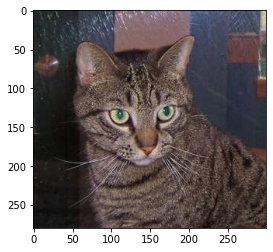

In [4]:
plt.imshow(cat_img_train)

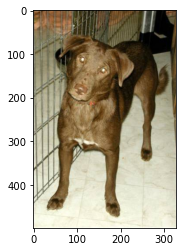

In [5]:
plt.imshow(dog_img_train)

Reading or visualizing the first image from our test set

In [6]:
cat_img_test = cv2.imread(r"C:\Users\Franks\Desktop\Trials\Cat vs Dog\test_set\cats\cat.4001.jpg")
dog_img_test = cv2.imread(r"C:\Users\Franks\Desktop\Trials\Cat vs Dog\test_set\dogs\dog.4001.jpg")
cat_img_test = cv2.cvtColor(cat_img_test,cv2.COLOR_BGR2RGB) # converting to RGB
dog_img_test = cv2.cvtColor(dog_img_test,cv2.COLOR_BGR2RGB) # converting to RGB

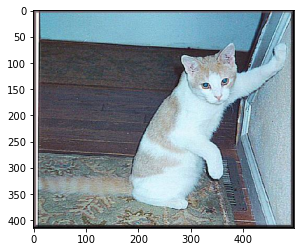

In [7]:
plt.imshow(cat_img_test)

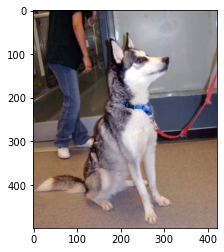

In [8]:
plt.imshow(dog_img_test)

checking the shape of image

In [9]:
cat_img_train.shape # 3 dimensional image with 3 channels RGB

(280, 300, 3)

Preprocessing

For preprocessing, the ImageDataGenerator library is imported and used 

image augumentation done with different arguments passed to help train on different variations of images to avoid overfitting but not necessary for testing only rescaling is ok

In [10]:
from keras.preprocessing.image import ImageDataGenerator 

In [11]:
# initializing our imageDataGen for train data and pass in the arguments
train_datagen = ImageDataGenerator(
    width_shift_range=0.1, # specifies the width shift of 10%
    height_shift_range=0.1,# specifies the height shift of 10%
    shear_range = 0.2, # crops part of the image by 20%
    zoom_range= 0.20, # # zooms the image by 20%
    horizontal_flip = True, # Secifies the horizontal flip
    rotation_range=20,# specifies the rotation to be 20%
    fill_mode='nearest', # fills using the nearest pixel
    rescale = 1/255 # rescaling to reduce size of data to save computational cost during processing
    
    )


test_datagen = ImageDataGenerator(rescale = 1/255)


appying our image data_gen objects to read our images from the folders so the output is passed to our model

flow_from_directory is used to identify the classes when images are grouped by folders,while read from dataframe when images are labelled

In [23]:
# creating our train data as train_df
train_ds = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (100,100),
    batch_size = 32,
    #class_mode = 'binary'
    class_mode = 'categorical'
        )


# creating our test data as test_df
test_ds = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'categorical'
    
        )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [24]:
# viewing the images loaded
images, labels = next(train_ds)

In [25]:
len(images)

32

In [26]:
# viewing the labels
labels # outs 0,1 bcos its binary but returns one hot encoding for categorical

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

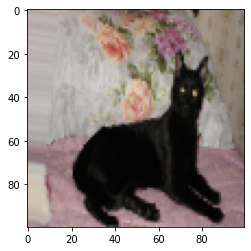

In [27]:
# view our preprocessed image, not very clear bcos we used low target_size of 100
plt.imshow(images[0])

Constructor stage

In [28]:
# importing deep learning algorothm
import tensorflow.keras as keras
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

In [29]:
# lets build our model and name it model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(100,100,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(100,100,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(100,100,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# after feature extraction flatten before moving to dense layer
model.add(Flatten())

model.add(Dense(64,activation = 'relu')) # Dense layer
# model.add(Dense(1,activation = 'sigmoid')) # final output layer can be 1 with sigmoid or 2 with softmax 
model.add(Dense(2,activation = 'softmax')) # final output layer can be 1 with sigmoid or 2 with softmax 

Compilation stage

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)      

Training stage

In [32]:
# in the Training stage we fit our model with our training data by assigning it a variable called history
history = model.fit(train_ds, epochs = 10)

Epoch 1/10
251/251 [==============================] - 120s 470ms/step - loss: 0.6635 - accuracy: 0.5885
Epoch 2/10
251/251 [==============================] - 113s 449ms/step - loss: 0.6116 - accuracy: 0.6633
Epoch 3/10
251/251 [==============================] - 111s 441ms/step - loss: 0.5840 - accuracy: 0.6904
Epoch 4/10
251/251 [==============================] - 112s 448ms/step - loss: 0.5640 - accuracy: 0.7066
Epoch 5/10
251/251 [==============================] - 113s 448ms/step - loss: 0.5471 - accuracy: 0.7207
Epoch 6/10
251/251 [==============================] - 117s 465ms/step - loss: 0.5228 - accuracy: 0.7397
Epoch 7/10
251/251 [==============================] - 111s 443ms/step - loss: 0.5020 - accuracy: 0.7528
Epoch 8/10
251/251 [==============================] - 112s 444ms/step - loss: 0.4823 - accuracy: 0.7659
Epoch 9/10
251/251 [==============================] - 112s 445ms/step - loss: 0.4756 - accuracy: 0.7680
Epoch 10/10
251/251 [==============================] - 113s 450m

Evaluation stage

In [34]:
loss, accuracy = model.evaluate(train_ds)

251/251 [==============================] - 65s 257ms/step - loss: 0.4565 - accuracy: 0.7845


In [33]:
loss, accuracy = model.evaluate(test_ds)

64/64 [==============================] - 15s 227ms/step - loss: 0.4150 - accuracy: 0.8186


In [66]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [67]:
pred = model.predict(test_ds)

64/64 [==============================] - 9s 143ms/step


In [68]:
# predicted values 
pred

array([[6.2213308e-01, 3.7786689e-01],
       [5.7316452e-01, 4.2683545e-01],
       [9.9152595e-01, 8.4740827e-03],
       ...,
       [7.7088815e-01, 2.2911187e-01],
       [9.7401422e-01, 2.5985714e-02],
       [4.6188579e-06, 9.9999535e-01]], dtype=float32)

In [69]:
# view actual labels
test_ds.classes

array([0, 0, 0, ..., 1, 1, 1])

In [70]:
# convert pred labels to binary
pred = np.argmax(pred, axis = 1)

In [71]:
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [72]:
# confusion matrix takes both actual value and predicted value
cm = confusion_matrix(test_ds.classes, pred)

In [83]:
cm

array([[558, 453],
       [546, 466]], dtype=int64)

In [75]:
# Classification report
from sklearn.metrics import classification_report

In [89]:
# classification report also takes in y_true, y_pred and labels
#print(classification_report(test_ds.classes, pred, labels = ['cats', 'dogs']))
print(classification_report(test_ds.classes, pred, target_names = ['cats', 'dogs']))

              precision    recall  f1-score   support

        cats       0.51      0.55      0.53      1011
        dogs       0.51      0.46      0.48      1012

    accuracy                           0.51      2023
   macro avg       0.51      0.51      0.51      2023
weighted avg       0.51      0.51      0.51      2023



In [77]:
# to get the labels
test_ds.class_indices

{'cats': 0, 'dogs': 1}

<AxesSubplot:>

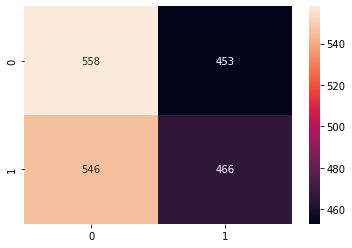

In [94]:
# visualising results
import seaborn as sns
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt='g', ax=ax)